In [2]:
##############################################
import sys,os
import numpy as np
import pylab as py
##############################################
import pylab as py
from  matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format = 'retina' 
##############################################
PATH='../python/'  # path of the JAMLIB python folder
sys.path.append(PATH)  
from corelib import JAMLIB
##############################################
import lhapdf
##############################################

## Loading the FFs

In [3]:
JAMffpi=JAMLIB(PATH+'JAM16/FFpion')
JAMffk=JAMLIB(PATH+'JAM16/FFkaon')

LHAffpi = lhapdf.mkPDF("JAM16_FF_pi_Ceven",member)
LHAffk = lhapdf.mkPDF("JAM16_FF_K_Ceven",member)

########################################################## 
                                                           
     _   _    __  __ _     ___ ____                        
    | | / \  |  \/  | |   |_ _| __ )                       
 _  | |/ _ \ | |\/| | |    | ||  _ \                       
| |_| / ___ \| |  | | |___ | || |_) |                      
 \___/_/   \_\_|  |_|_____|___|____/                       
                                                           
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
                                                           
Authors:                                                   
Nobuo Sato         (Jefferson Lab)                         
Jake Ethier        (College of William and Mary)           
Wally Melnitchouk  (Jefferson Lab)                         
Alberto Accardi    (Hampton University and Jefferson Lab)  
########################################################## 
loading JAM16/FFpion tables [100%]
#####

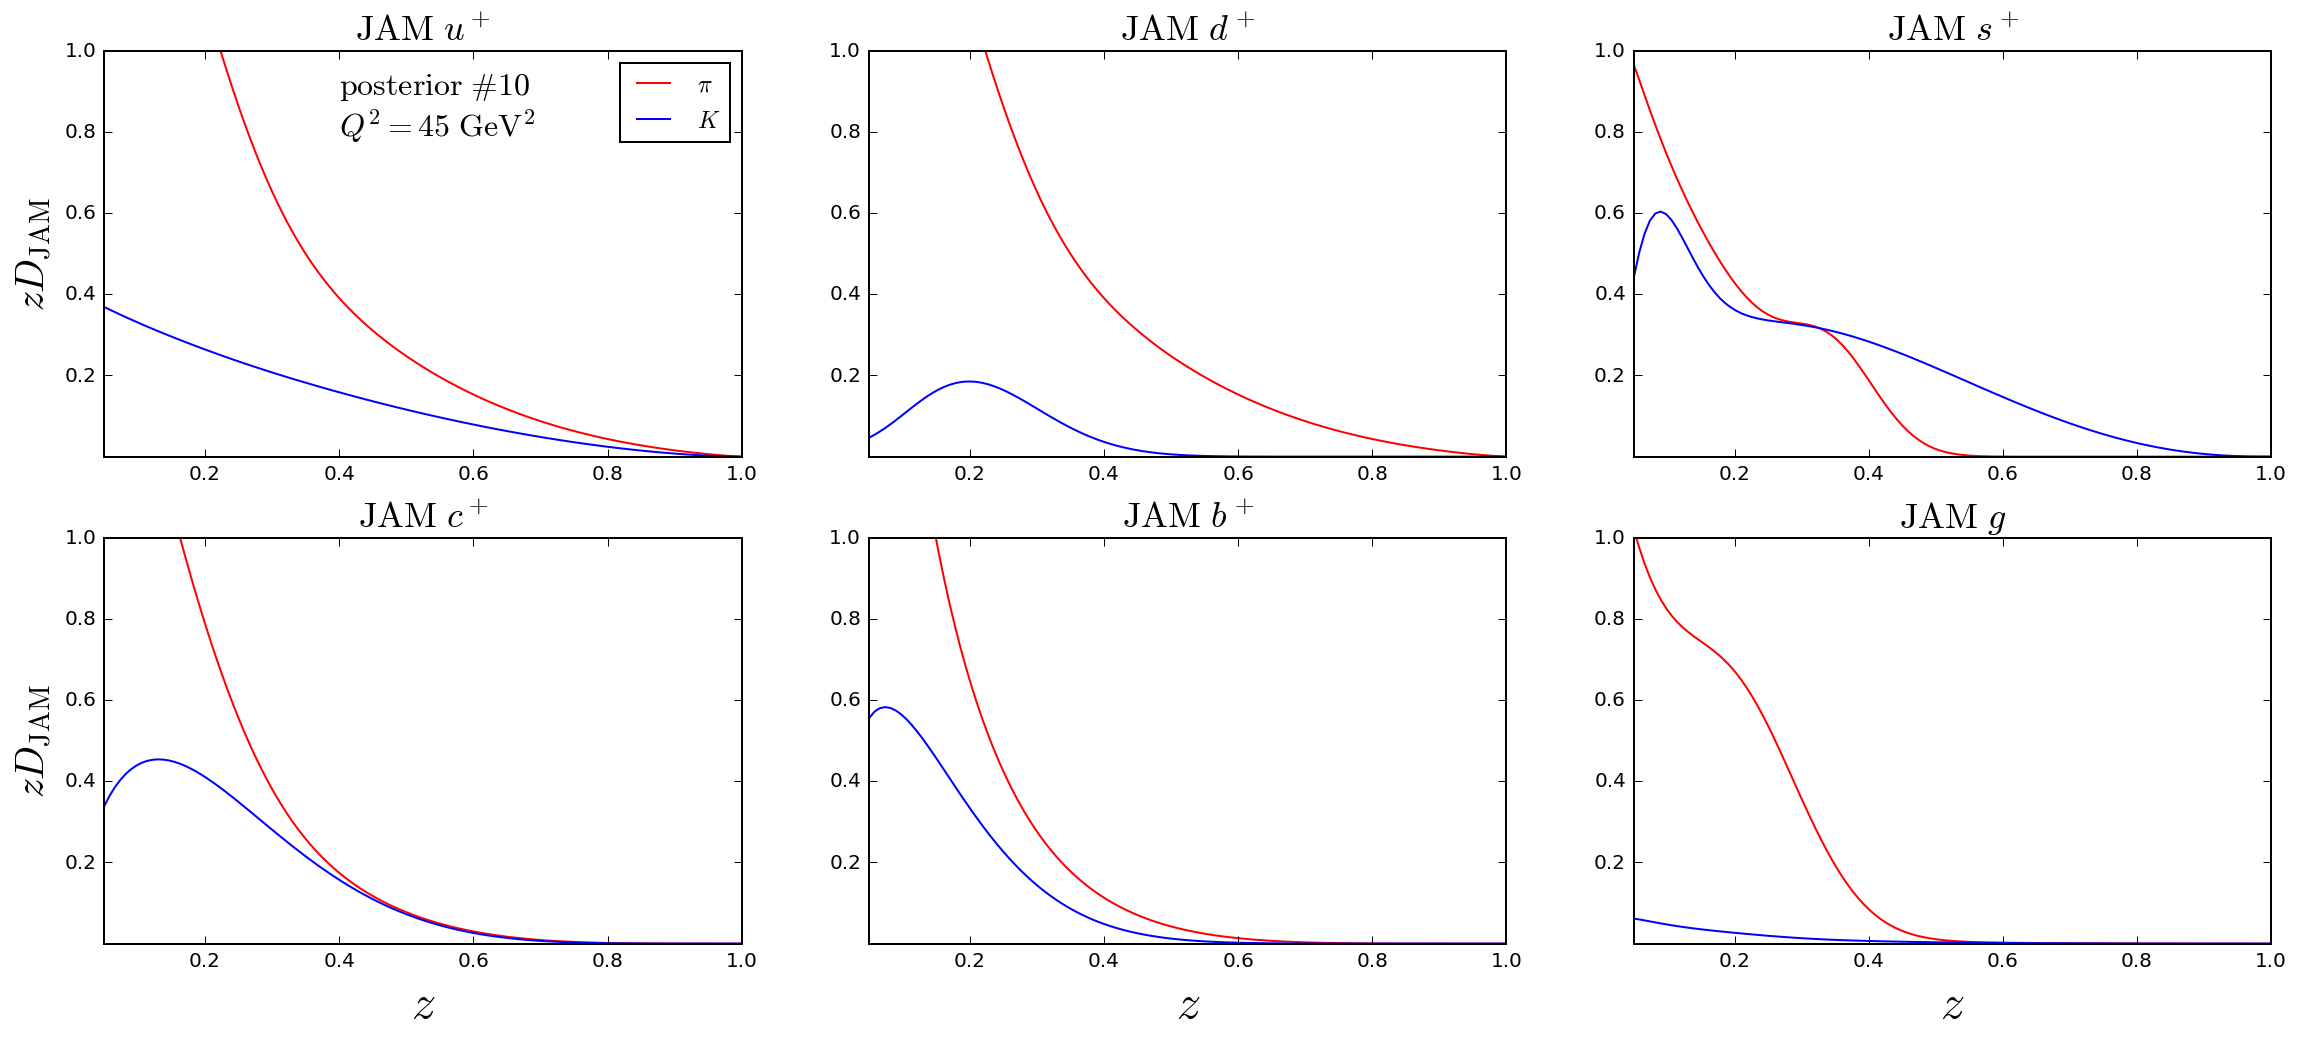

In [4]:
#Plot of JAM z*D(z,Q2) vs z 

post = 10
Q2 = 45. #JAMffpi.mZ2 #1.17210230e+02
nz=120
z = np.linspace(0.05,1,120)

zpi_JAM = []
zk_JAM = []
for f in ['up','dp','sp','cp','bp','g']:
  zpi_JAM.append([JAMffpi.get_XF(post,f,z[i],Q2) for i in range(len(z))])
  zk_JAM.append([JAMffk.get_XF(post,f,z[i],Q2) for i in range(len(z))])

nrow,ncol,zoom=2,3,4
fig = plt.figure(figsize=(zoom*ncol*1.618,zoom*nrow))

plotlims = [0.05,1,1e-6,1.0]
plotscale = 'linear'

flavors = ['up','dp','sp','cp','bp','g']

cnt=0
for f in flavors:  
  cnt+=1
  plt.subplot(2,3,cnt)
  plt.plot(z,zpi_JAM[cnt-1],'r-',label='$\pi$')
  plt.plot(z,zk_JAM[cnt-1],'b-',label='$K$')
  plt.axis(plotlims)
  plt.yscale(plotscale)
  plt.title(r'${\rm JAM\ } %s$'%f.replace('p','^+'),size=18*zoom/4)
  if f in ['cp','bp','g']: 
    plt.xlabel('$z$', fontsize=24) #Label x axis
  if f in ['up','cp']: 
    plt.ylabel('$zD_{\\rm JAM}$',fontsize=20*zoom/4) # Label y axis
  if f in ['up']: 
    if plotscale=='linear':
      xQ,yQ = 0.4,0.79
      yQp = 1.13*yQ
    elif plotscale=='log':
      xQ,yQ = 0.1,3e-6
      yQp = np.exp(0.88*np.log(yQ))
    plt.text(xQ,yQp,r'${\rm posterior\ \#%d}$'%post,fontsize=16*zoom/4)
    plt.text(xQ,yQ,r'$Q^2=%0.0f {\rm\ GeV}^2$'%Q2 ,fontsize=16*zoom/4)
    plt.legend()

#plt.savefig('fig.JAM.%0.0f.png'%Q2)
plt.show()

## $z$ dependence

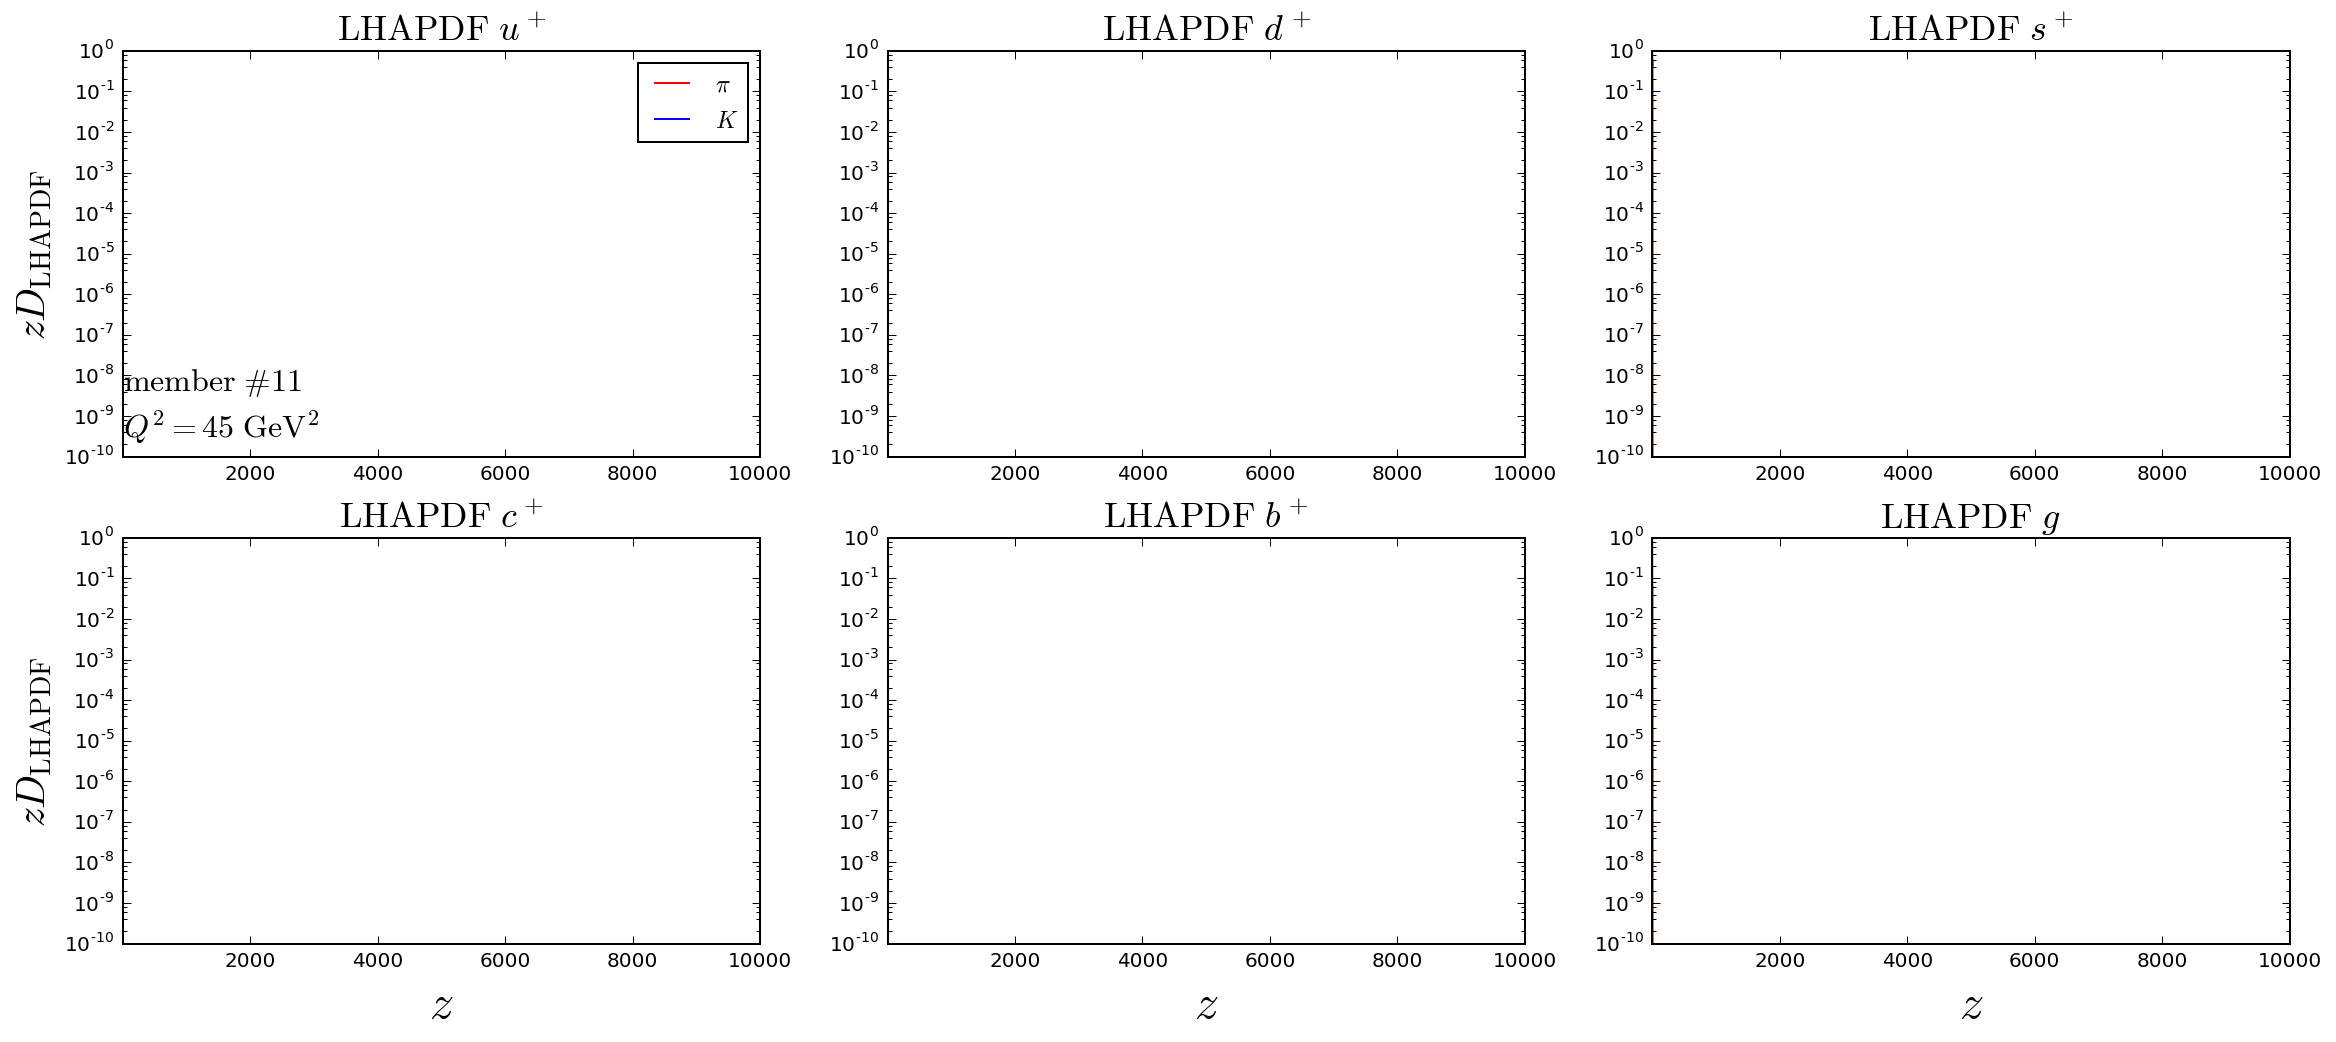

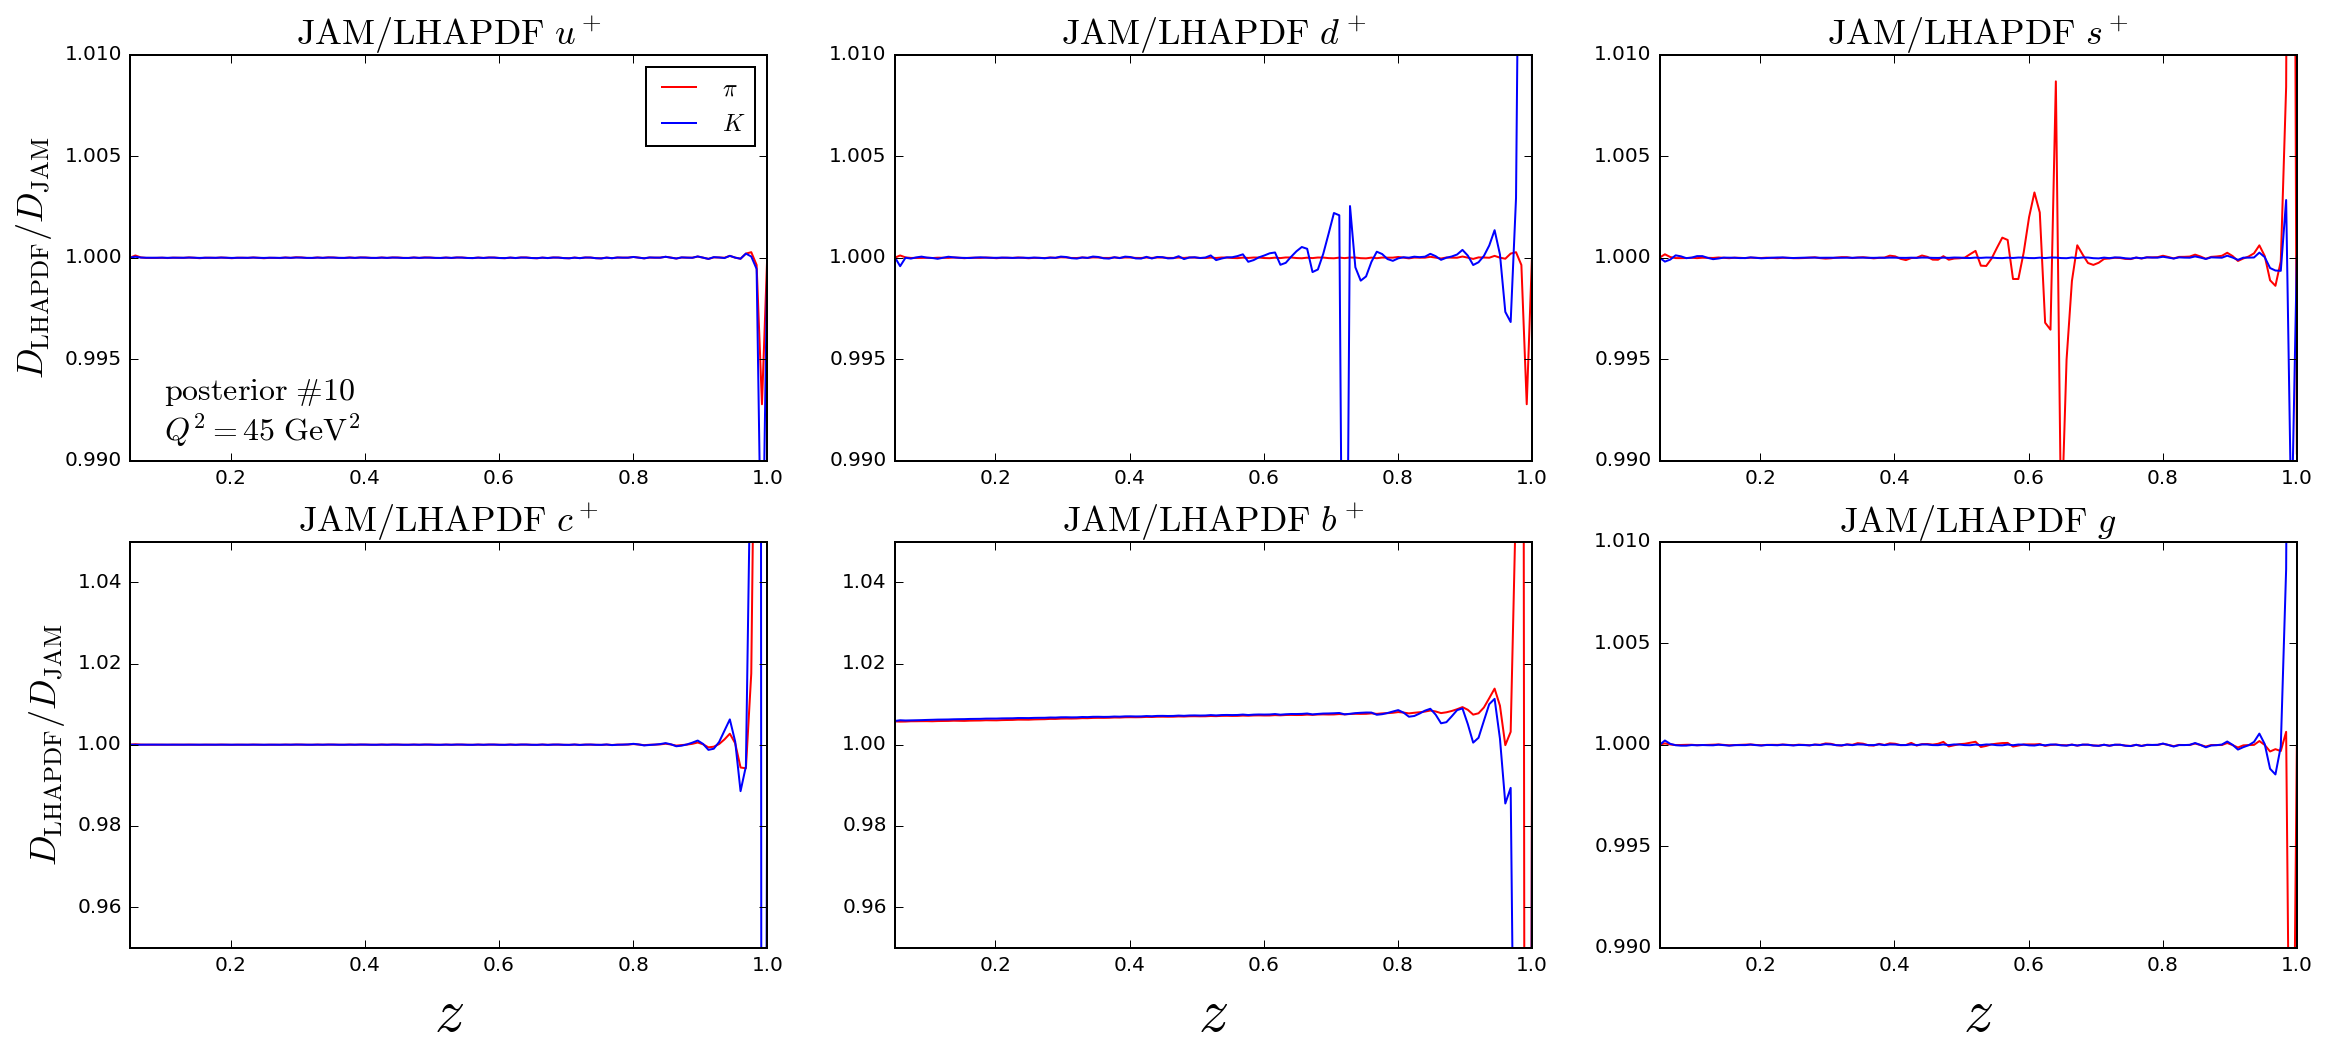

In [30]:
post = 10     # <-- JAM posterior
Q2 = 45. #JAMffpi.mZ2 #1.17210230e+02
nz=120
z = np.linspace(0.05,1,120)

# JAM calculations vs. x
zpi_JAM = []
zk_JAM = []
for f in ['up','dp','sp','cp','bp','g']:
  zpi_JAM.append([JAMffpi.get_XF(post,f,z[i],Q2) for i in range(len(z))])
  zk_JAM.append([JAMffk.get_XF(post,f,z[i],Q2) for i in range(len(z))])

# LHAPDF calculations vs z 
member = post+1 # same posterior as JAM (member=0 is the average)

LHAffpi = lhapdf.mkPDF("JAM16_FF_pi_Ceven",member)
LHAffk = lhapdf.mkPDF("JAM16_FF_K_Ceven",member)

zpi_lha = []
zk_lha = []
for f in [902,901,903,904,905,21]:
  zpi_lha.append([LHAffpi.xfxQ2(f,z[i],Q2) for i in range(len(z))])
  zk_lha.append([LHAffk.xfxQ2(f,z[i],Q2) for i in range(len(z))])
  

### FF plots
  
nrow,ncol,zoom=2,3,4
fig = plt.figure(figsize=(zoom*ncol*1.618,zoom*nrow))

plotlims = [1.,1e4,1e-10,1.0]
plotscale = 'log'

flavors = ['up','dp','sp','cp','bp','g']


cnt=0
for f in flavors:  
  cnt+=1
  plt.subplot(2,3,cnt)
  plt.plot(z,zpi_lha[cnt-1],'r-',label='$\pi$')
  plt.plot(z,zk_lha[cnt-1],'b-',label='$K$')
  plt.axis(plotlims)
  plt.yscale(plotscale)
  plt.title(r'${\rm LHAPDF\ } %s$'%f.replace('p','^+'),size=18*zoom/4)
  if f in ['cp','bp','g']: 
    plt.xlabel('$z$', fontsize=24) #Label x axis
  if f in ['up','cp']: 
    plt.ylabel('$zD_{\\rm LHAPDF}$',fontsize=20*zoom/4) # Label y axis
  if f in ['up']: 
    if plotscale=='linear':
      xQ,yQ = 0.4,0.79
      yQp = 1.13*yQ
    elif plotscale=='log':
      xQ,yQ = 0.1,3*plotlims[2]
      yQp = np.exp(0.88*np.log(yQ))
    plt.text(xQ,yQp,r'${\rm member\ \#%d}$'%member,fontsize=16*zoom/4)
    plt.text(xQ,yQ,r'$Q^2=%0.0f {\rm\ GeV}^2$'%Q2 ,fontsize=16*zoom/4)
    plt.legend()

#plt.savefig('fig.LHAPDF.%0.0f.png'%Q2)
plt.show()


### Ratios JAM/LHAPDF 

rpi = []
rk = []
for f in [0,1,2,3,4,5]:
  rpi.append([zpi_JAM[f][i]/zpi_lha[f][i] for i in range(len(z))])
  rk.append([zk_JAM[f][i]/zk_lha[f][i] for i in range(len(z))])

###  FF plots

nrow,ncol,zoom=2,3,4
fig = plt.figure(figsize=(zoom*ncol*1.618,zoom*nrow))
plotlims=[0.05,1,0.99,1.01]

flavors = ['up','dp','sp','cp','bp','g']

cnt=0
for f in flavors:  
  cnt+=1
  plt.subplot(2,3,cnt)
  plt.plot(z,rpi[cnt-1],'r-',label='$\pi$')
  plt.plot(z,rk[cnt-1],'b-',label='$K$')
  plt.title(r'${\rm JAM/LHAPDF\ } %s$'%f.replace('p','^+'),size=18*zoom/4)
  plt.axis(plotlims)
  if f in ['cp','bp']: 
    plt.axis([0.05,1,0.95,1.05])
  if f in ['cp','bp','g']: 
    plt.xlabel('$z$', fontsize=30) #Label x axis
  if f in ['up','cp']: 
    plt.ylabel('$D_{\\rm LHAPDF}/D_{\\rm JAM}$',fontsize=18*zoom/4) # Label y axis
  if f in ['up']:
    rel=0.15*zoom/4
    plt.text(0.1,(1-rel)*plotlims[2]+rel*plotlims[3],r'${\rm posterior\ \#%d}$'%post,fontsize=16*zoom/4)
    rel=0.05
    plt.text(0.1,(1-rel)*plotlims[2]+rel*plotlims[3],r'$Q^2=%0.0f {\rm\ GeV}^2$'%Q2 ,fontsize=16)
    plt.legend()

#plt.savefig('fig.LHA_JAM.%0.0f.png'%Q2)
plt.show()



In [32]:
print Qsq
print zpi_lha[0]

10000.0
[2.2468241501177433, 2.174670317364772, 2.1026819493393094, 2.0315477974787344, 1.9620920297356088, 1.8945765607820377, 1.8290644908118663, 1.7655524873293602, 1.7038449683657777, 1.643917438442633, 1.585613573443676, 1.5287770152848212, 1.4733910730013262, 1.4193284588171837, 1.366452804683635, 1.3148064883460662, 1.2643398558258088, 1.2150020623572693, 1.1668689830329382, 1.1199264814023075, 1.074153408358725, 1.0296600242753564, 0.9864720861515863, 0.944598568515609, 0.904148121168062, 0.8651288782815059, 0.8275393510581887, 0.791460265326565, 0.7568954556680916, 0.7238240692375516, 0.692302582763713, 0.662252066894998, 0.6337095262970074, 0.6066254897613209, 0.5809345399905165, 0.5565869578408283, 0.5335686083129207, 0.5117677362094912, 0.49116117619491667, 0.47167122012930524, 0.4532130961904459, 0.4357174792869493, 0.41914590214109154, 0.403394605705258, 0.388428740911026, 0.37418303775418643, 0.3605884799869575, 0.34758950452360543, 0.33516075760896247, 0.323228350735182

## $Q^2$ dependence

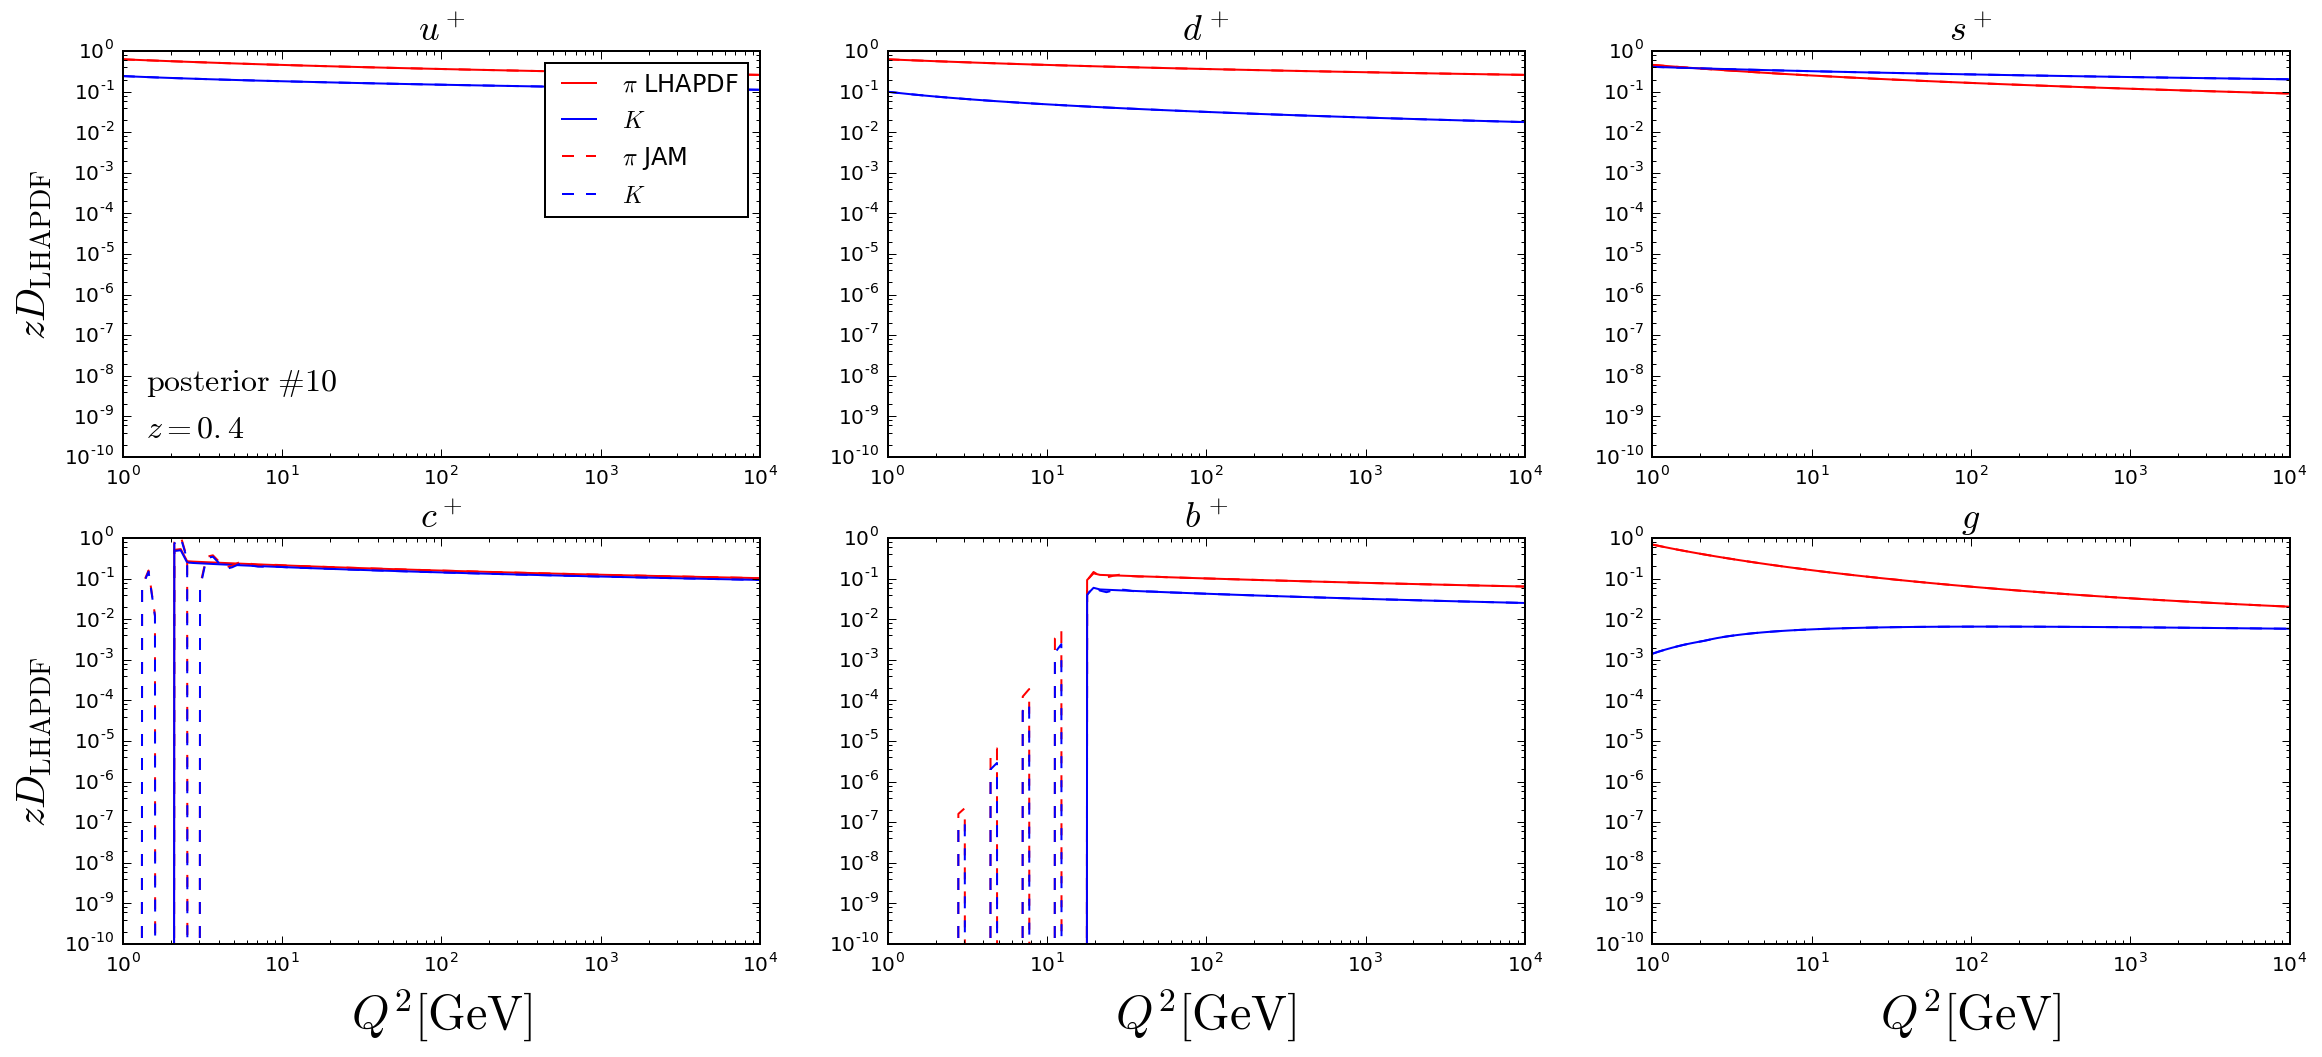

-c:71: RuntimeWarning: divide by zero encountered in double_scalars
-c:72: RuntimeWarning: divide by zero encountered in double_scalars


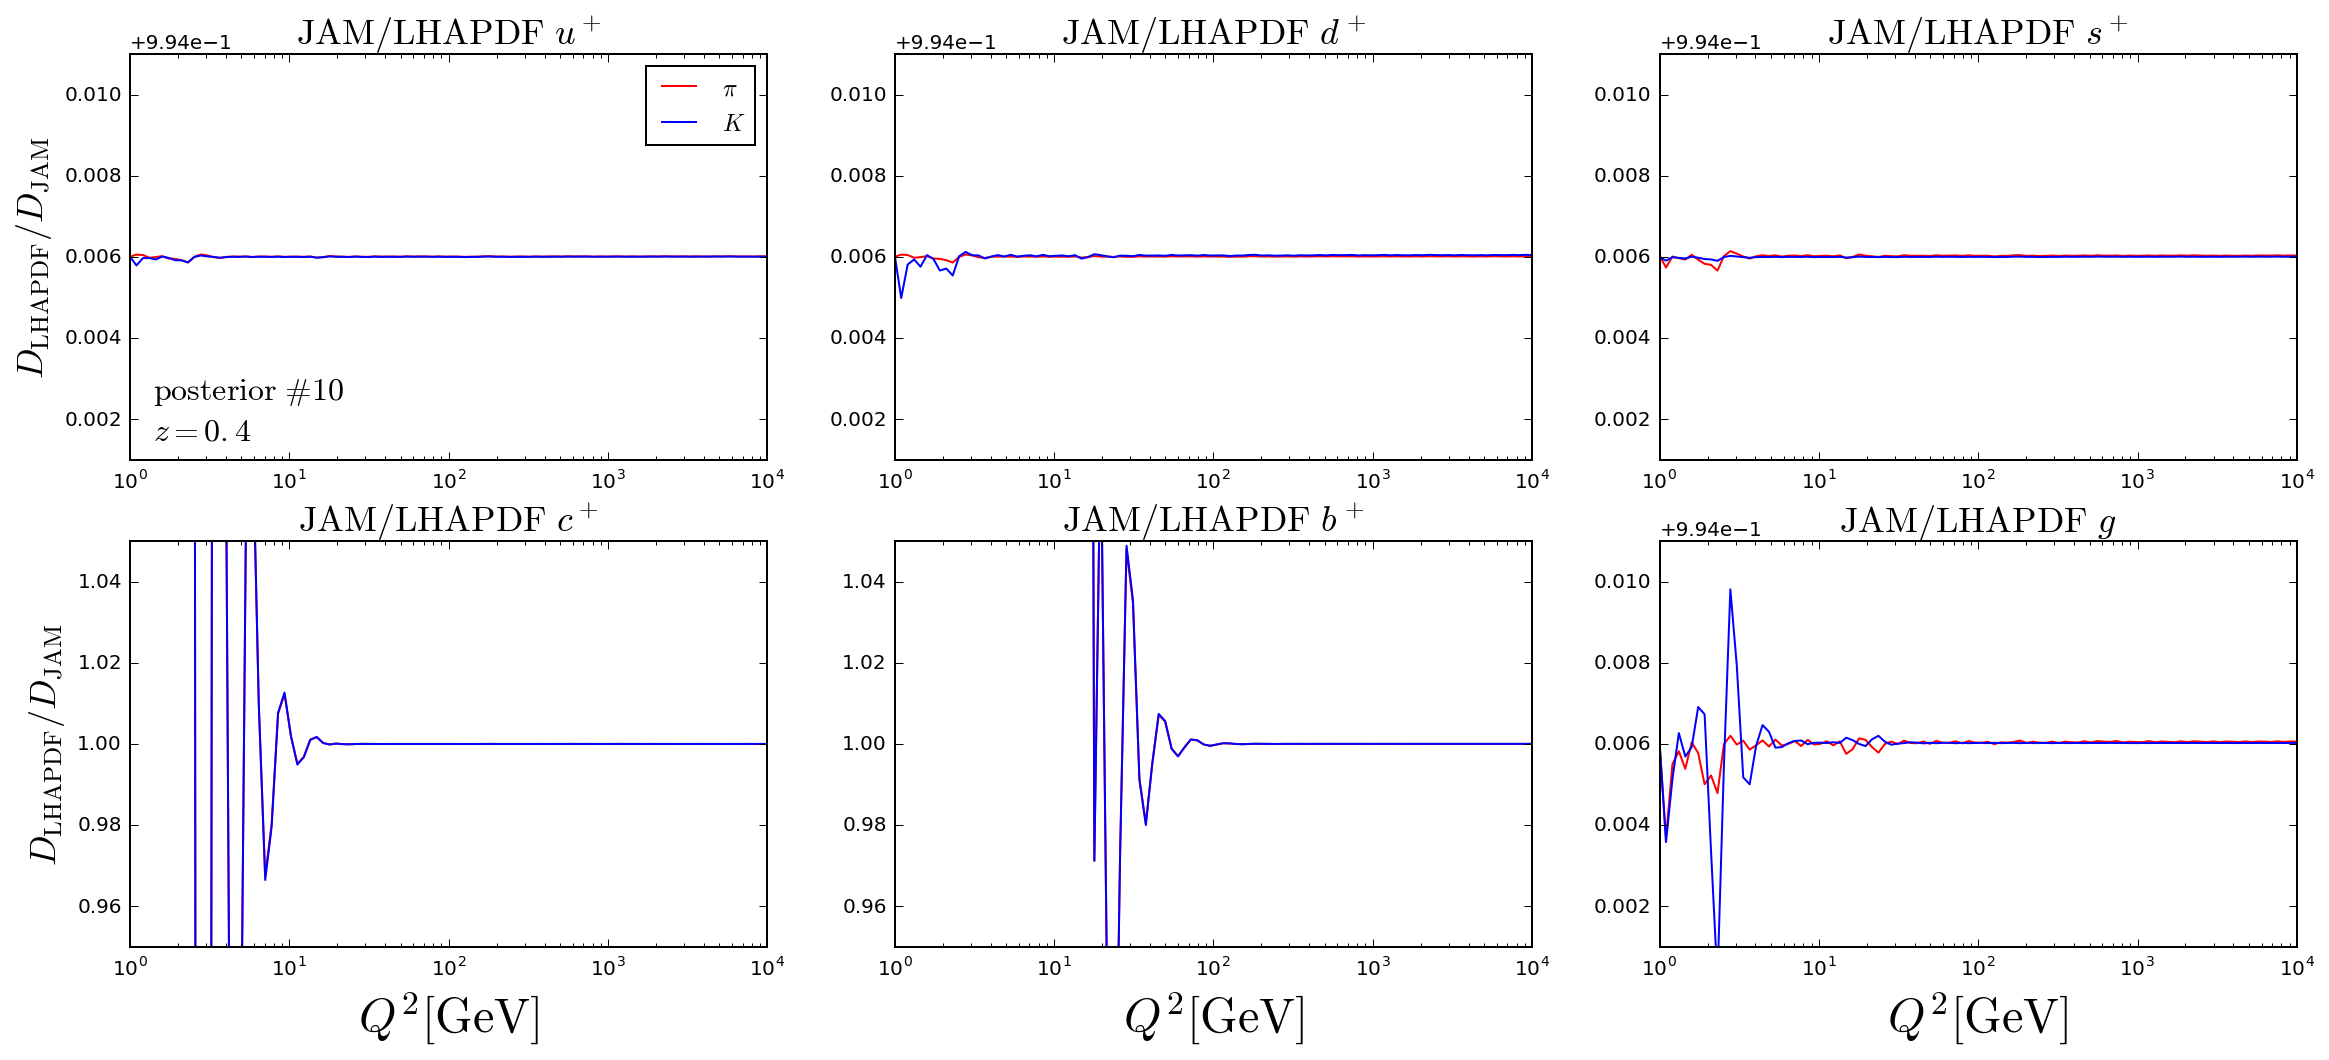

In [58]:
post = 10     # <-- JAM posterior
z = 0.4 
FFchoice = 'LHAPDF'
nQ=100
Q2 = np.logspace(0,4,nQ)


# JAM calculations vs. x
zpi_JAM = []
zk_JAM = []
for f in ['up','dp','sp','cp','bp','g']:
  zpi_JAM.append([JAMffpi.get_XF(post,f,z,Qsq) for Qsq in Q2])
  zk_JAM.append([JAMffk.get_XF(post,f,z,Qsq) for Qsq in Q2])

# LHAPDF calculations vs z 
member = post+1 # same posterior as JAM (member=0 is the average)

zpi_LHA = []
zk_LHA = []
for f in [902,901,903,904,905,21]:
  zpi_LHA.append([LHAffpi.xfxQ2(f,z,Qsq) for Qsq in Q2])
  zk_LHA.append([LHAffk.xfxQ2(f,z,Qsq) for Qsq in Q2])
  

### FF plots
  
nrow,ncol,zoom=2,3,4
fig = plt.figure(figsize=(zoom*ncol*1.618,zoom*nrow))

plotlims = [1,1e4,1e-10,1.0]
plotscale = 'log'

flavors = ['up','dp','sp','cp','bp','g']

cnt=0
for f in flavors:  
  cnt+=1
  plt.subplot(2,3,cnt)
  plt.plot(Q2,zpi_LHA[cnt-1],'r-',label='$\pi$ LHAPDF')
  plt.plot(Q2,zk_LHA[cnt-1],'b-',label='$K$' )
  plt.plot(Q2,zpi_JAM[cnt-1],'r--',label='$\pi$ JAM')
  plt.plot(Q2,zk_JAM[cnt-1],'b--',label='$K$')
  plt.axis(plotlims)
  plt.yscale(plotscale)
  plt.xscale('log')
  plt.title(r'$%s$'%f.replace('p','^+'),size=18*zoom/4)
  if f in ['cp','bp','g']: 
    plt.xlabel(r'$Q^2 {\rm [GeV]}$', fontsize=24) #Label x axis
  if f in ['up','cp']: 
    plt.ylabel('$zD_{\\rm LHAPDF}$',fontsize=20*zoom/4) # Label y axis
  if f in ['up']: 
    if plotscale=='linear':
      xQ,yQ = 1.4,0.79
      yQp = 1.13*yQ
    elif plotscale=='log':
      xQ,yQ = 1.4,3*plotlims[2]
      yQp = np.exp(0.88*np.log(yQ))
    plt.text(xQ,yQp,r'${\rm posterior\ \#%d}$'%post,fontsize=16*zoom/4)
    plt.text(xQ,yQ,r'$z=%0.1f$'%z ,fontsize=16*zoom/4)
    plt.legend()

plt.savefig('fig.LHAPDF.z%0.1f.png'%z)
plt.show()


### Ratios JAM/LHAPDF 

rpi = []
rk = []
for f in [0,1,2,3,4,5]:
  rpi.append([zpi_JAM[f][i]/zpi_LHA[f][i] for i in range(len(Q2))])
  rk.append([zk_JAM[f][i]/zk_LHA[f][i] for i in range(len(Q2))])

###  FF plots

nrow,ncol,zoom=2,3,4
fig = plt.figure(figsize=(zoom*ncol*1.618,zoom*nrow))

flavors = ['up','dp','sp','cp','bp','g']

plotlims = [1,1e4,0.995,1.005]

cnt=0
for f in flavors:  
  cnt+=1
  plt.subplot(2,3,cnt)
  plt.plot(Q2,rpi[cnt-1],'r-',label='$\pi$')
  plt.plot(Q2,rk[cnt-1],'b-',label='$K$')
  plt.title(r'${\rm JAM/LHAPDF\ } %s$'%f.replace('p','^+'),size=18*zoom/4)
  plt.axis(plotlims)
  plt.xscale('log')
  if f in ['cp','bp']: 
    plt.axis([1,1e4,0.95,1.05])
  if f in ['cp','bp','g']: 
    plt.xlabel(r'$Q^2 {\rm [GeV]}$', fontsize=24) #Label x axis
  if f in ['up','cp']: 
    plt.ylabel('$D_{\\rm LHAPDF}/D_{\\rm JAM}$',fontsize=18*zoom/4) # Label y axis
  if f in ['up']:
    rel=0.15*zoom/4
    plt.text(1.4,(1-rel)*plotlims[2]+rel*plotlims[3],r'${\rm posterior\ \#%d}$'%post,fontsize=16*zoom/4)
    rel=0.05
    plt.text(1.4,(1-rel)*plotlims[2]+rel*plotlims[3],r'$z=%0.1f$'%z ,fontsize=16)
    plt.legend()

plt.savefig('fig.LHA_JAM.z%0.1f.png'%z)
plt.show()



In [33]:
print zpi_lha[0]
print Q2

[2.2468241501177433, 2.174670317364772, 2.1026819493393094, 2.0315477974787344, 1.9620920297356088, 1.8945765607820377, 1.8290644908118663, 1.7655524873293602, 1.7038449683657777, 1.643917438442633, 1.585613573443676, 1.5287770152848212, 1.4733910730013262, 1.4193284588171837, 1.366452804683635, 1.3148064883460662, 1.2643398558258088, 1.2150020623572693, 1.1668689830329382, 1.1199264814023075, 1.074153408358725, 1.0296600242753564, 0.9864720861515863, 0.944598568515609, 0.904148121168062, 0.8651288782815059, 0.8275393510581887, 0.791460265326565, 0.7568954556680916, 0.7238240692375516, 0.692302582763713, 0.662252066894998, 0.6337095262970074, 0.6066254897613209, 0.5809345399905165, 0.5565869578408283, 0.5335686083129207, 0.5117677362094912, 0.49116117619491667, 0.47167122012930524, 0.4532130961904459, 0.4357174792869493, 0.41914590214109154, 0.403394605705258, 0.388428740911026, 0.37418303775418643, 0.3605884799869575, 0.34758950452360543, 0.33516075760896247, 0.3232283507351828, 0.311

In [81]:
print JAMffpi.get_Q2grid()

[  1.00000000e+00   1.26384820e+00   1.59731228e+00   2.01876025e+00
   2.04490000e+00   2.55140652e+00   3.22459055e+00   4.07539297e+00
   5.15067808e+00   6.50967523e+00   8.22724134e+00   1.03979842e+01
   1.31414736e+01   1.66088278e+01   1.84900000e+01   2.09910372e+01
   2.65294846e+01   3.35292415e+01   4.23758716e+01   5.35566692e+01
   6.76875001e+01   8.55467254e+01   1.08118075e+02   1.36644835e+02
   1.72698329e+02   2.18264473e+02   2.75853162e+02   3.48636523e+02
   4.40623643e+02   5.56881399e+02   7.03813555e+02   8.89513497e+02
   1.12421004e+03   1.42083083e+03   1.79571449e+03   2.26951054e+03
   2.86831681e+03   3.62511705e+03   4.58159767e+03   5.79044398e+03
   7.31824222e+03   9.24914728e+03   1.16895182e+04   1.47737765e+04
   1.86718109e+04   2.35983347e+04   2.98247129e+04   2.98944100e+04
   3.76939098e+04   4.76393801e+04   6.02089449e+04   7.60949669e+04
   9.61724871e+04   1.21547425e+05   1.53617495e+05   1.94149195e+05
   2.45375111e+05   3.10116893e+05